<h1>Deducing Investment Opportunity for a Real Estate Investment Company</h1>

By: [Tamjid Ahsan](https://www.linkedin.com/in/tamjidahsan/) 

<br>

As phase 4 project of [Flatiron Data Science Bootcamp](https://flatironschool.com/campus-and-online-data-science-bootcamp/).
* Student pace: Full Time
* Scheduled project review date/time: June 24, 2021, 05:00 PM [DST]
* Instructor name: James Irving
___

<br>

<h2>OVERVIEW</h2>

<br>
<p>New York City is among the most expensive and competitive housing markets in the USA. It was impacted severely by the COVID-19 with high job loss. NYC is among the top impacted areas of the country. New York has been recovering from the economic impacts of the pandemic as of mid 2021. The strong buyer demand has also changed the dynamics of the residential real estate sales market that had been cooling for nearly three years. </p>
<p>NYC, however, is still a buyer's real estate market and buyers may have an opportunity to get some heavy discounts. </p>
<p>Many industry experts have been predicting a strong property appreciation in New York starting from 2021. 2021 is should be a great year for property owners. Different business sectors have been opening up in different ways and at differing speeds with relaxing COVID-19 policies. The current trends show that the New York housing market will be hyperactive in the peak home-buying season. </p>


Home prices are still low compared to where they were last year, just before the pandemic hit New York City. Most buyers aren't paying sellers' asking prices.
In April 2021, the New York real estate market (statewide) showed strong sales due to pent-up buyer demand, according to the most recent housing report released by the [New York State Association of REALTORS®](https://www.nysar.com/). Closed and pending sales remained strong in April of 2021, marking the eighth consecutive month of sales growth in year-over-year comparisons. Since 2012, the NYC home values have appreciated by nearly 52% as per [Zillow Home Value Index](https://www.zillow.com/research/zhvi-methodology-2019-highlights-26221/).

<p>This makes New York as one of the best real estate market for homes to get into as the house prices are relatively low, high buyer power and huge inventory of homes for sale to choose from and a projected uptrend in price leading to higher return on investment.

Ref: [Norada Real Estate](https://www.noradarealestate.com/blog/new-york-real-estate-market/), [NY Post](https://nypost.com/article/nyc-real-estate-market-housing-prices/).

</p>

___

<br>


<h2>BUSINESS PROBLEM</h2>

<br>

<p><strong><em>XYZ, Inc. LLC</strong></em> is a (read: fictional) private equity investment company based on Queens, New York. They want to invest in the housing market for relatively short term, three years. They want to isolate and invest in properties with the highest return on investment potential based on geographical location close to their operation base in Queens, as they want to cluster their investment based on location. For this analysis, all 55 zipcodes of Queens county of New York city, NY were considered.</p>

<br>

<p>This analysis will recommend <strong>top five</strong> zipcodes with with return on investment potential with some insights, which will aid the top management of the company to make an educated decision on where to invest.</p><br>



<img src="./assets/image_1.gif"
     alt="head!"
     style="float: center; margin-center: 2px;">

<br>

Source: image generated by author using plotly, and online gif maker.

___

<h2>Methodology</h2>

<br>

- Zillow House Value dataset is used. (more info on OBTAIN section)
- Data Science Process of the O.S.E.M.N. framework is adapted for this analysis
- Several analysis techniques were used such as conventional time series method such as `ARIMA` and `SARIMAX` by `statsmodels` on all zipcodes.
 - not including `white nosie` or `random walk model`s.
- forecasting procedure implemented by Facebook, Inc. named `Prophet` for a handful of zipcodes, can be found in APPENDIX.

- Implementation of recurrent neural network (RNN - LTMS and GRU) and transfer learning (combining `SARIMAX` and `RNN`) is a work in progress.

___

<h2>IMPORTS</h2>

<br>

- custom functions are used, can be found in `./imports_and_functions/functions.py`
- most of the imports and notebook formatting used in this analysis is in `./imports_and_functions/packages.py`
- those are also available in the APPENDIX section.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import imports_and_functions as fn
from imports_and_functions.packages import *

%matplotlib inline
mpl.rcParams['figure.facecolor'] = '#232323'

# OBTAIN

- Main dataset: 
  - Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. This data is used for the Time Series analysis obtained form [Zillow Research](https://www.zillow.com/research/data/). This data is separated by zipcode. A copy of that file renamed as `zillow_raw_2021.csv` can be found [here](https://github.com/tamjid-ahsan/dsc-phase-4-project/blob/38580a57208e29a48892293800a5dd12983dbfba/data/zillow_raw_2021.csv). Explanation of methodology can be found [here](https://www.zillow.com/research/zhvi-methodology-2019-deep-26226/).
- GeoJson:
  - GeoJson file used to generate map is sourced from [here](https://github.com/OpenDataDE/State-zip-code-GeoJSON/blob/4cc2657044efd08477465aed1912dca30198d441/ny_new_york_zip_codes_geo.min.json) provided by [Open Data Delaware](https://github.com/OpenDataDE/). A copy of that can be found at `./data/ny_new_york_zip_codes_geo.min.json` in this repository.
- Zipcodes with Neighborhood information
 - This file was obtained from [here](https://github.com/erikgregorywebb/nyc-housing/blob/master/Data/nyc-zip-codes.csv). A copy of this can be found at `./data/nyc-zip-codes.txt` in this repository.

## Zillow Dataset information

In [7]:
# information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30842 entries, 0 to 30841
Columns: 313 entries, RegionID to 2021-04-30
dtypes: float64(304), int64(3), object(6)
memory usage: 73.7+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,200075.0,198830.0,198897.0,198875.0,199330.0,199883.0,199785.0,200486.0,200791.0,202185.0,203256.0,204599.0,205854.0,208337.0,209743.0,210538.0,211254.0,212008.0,214267.0,214731.0,216143.0,215848.0,217565.0,219811.0,222770.0,225601.0,229202.0,233366.0,236664.0,240139.0,242354.0,...,1017039.0,1027584.0,1038953.0,1058026.0,1062802.0,1072237.0,1070957.0,1083433.0,1078314.0,1078464.0,1069361.0,1065229.0,1083891.0,1095244.0,1116158.0,1110777.0,1110752.0,1100678.0,1081990.0,1056843.0,1052388.0,1056984.0,1068839.0,1065266.0,1064037.0,1051885.0,1033799.0,1025042.0,1023762.0,1030265.0,1044070.0,1059557.0,1067331.0,1068534.0,1069807.0,1081347.0,1081855.0,1092196.0,1104487.0,1121360.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,266953.0,266255.0,265226.0,264005.0,262194.0,261265.0,259796.0,261551.0,263668.0,268043.0,271194.0,273875.0,275390.0,276139.0,277481.0,277514.0,278723.0,278493.0,279105.0,273341.0,266862.0,256874.0,250329.0,245524.0,243611.0,243305.0,243173.0,244126.0,244968.0,246046.0,247259.0,...,500490.0,503618.0,503321.0,501952.0,501775.0,502644.0,501921.0,501393.0,501173.0,502087.0,503423.0,503898.0,501679.0,498741.0,497160.0,497229.0,497914.0,497895.0,498210.0,497380.0,495573.0,493739.0,492233.0,491211.0,491579.0,492792.0,495301.0,496676.0,497142.0,497434.0,498824.0,500922.0,503725.0,506441.0,508991.0,511451.0,513654.0,515983.0,517482.0,519569.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,270721.0,270778.0,270928.0,271892.0,273296.0,274445.0,274827.0,274941.0,275373.0,276192.0,277288.0,278418.0,279930.0,282078.0,284714.0,286627.0,288259.0,290317.0,293412.0,296630.0,299798.0,302747.0,305990.0,309695.0,313155.0,315606.0,317359.0,318912.0,320546.0,322994.0,325994.0,...,1118937.0,1143405.0,1157115.0,1166380.0,1153814.0,1149301.0,1149279.0,1164975.0,1182952.0,1194928.0,1187956.0,1161743.0,1135281.0,1109912.0,1109211.0,1096399.0,1094837.0,1090185.0,1090223.0,1083327.0,1062489.0,1056177.0,1064622.0,1090206.0,1116017.0,1126414.0,1126998.0,1128540.0,1131833.0,1131653.0,1131516.0,1133589.0,1144334.0,1144987.0,1140435.0,1130923.0,1121519.0,1120821.0,1118048.0,1120428.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,202764.0,203015.0,202815.0,201613.0,200462.0,199788.0,200559.0,200243.0,199583.0,198783.0,199696.0,201400.0,203988.0,205247.0,206537.0,208768.0,211253.0,212984.0,212649.0,214817.0,217355.0,219585.0,218642.0,216914.0,214151.0,212522.0,210797.0,209847.0,208798.0,208384.0,208275.0,...,336842.0,337027.0,336740.0,337165.0,338230.0,339089.0,339159.0,339568.0,340104.0,340498.0,340884.0,340333.0,340630.0,340471.0,340445.0,339382.0,338793.0,338852.0,339754.0,340069.0,340740.0,340844.0,340833.0,340166.0,339808.0,339685.0,339983.0,340576.0,341578.0,342531.0,343268.0,344710.0,346294.0,348806.0,351884.0,356253.0,360496.0,365462.0,370763.0,376914.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,358937.0,357924.0,356564.0,354951.0,352590.0,351119.0,348860.0,350886.0,353574.0,359379.0,363727.0,367727.

Column explainer:<br>

<br>

| Column Name | Expaination | Range |
|-|-|-|
| RegionID | Unique Region Identifyer | from 58001 to 753844 |
| SizeRank | Ranked by Population | from 0 to 35187 |
| RegionName | Zipcode | 30842 unique values |
| RegionType | Type of location | constant value of "Zip" |
| StateName | Name of State | 51  unique values |
| State | Name of State | 51  unique values |
| City | City name | 15005 unique values |
| Metro | Metromoliton area | 862 unique values |
| CountyName | Name of county | 1758 unique values |
|  |  |  |
| Rest of the colums | dates | from Jan 31, 1996 to Apr 30, 2021 |


* steps are not shown to find out those values as this dataset will be sliced to focus only on Queens County, NY as per the goal of this analysis.

# SCRUB & EXPLORE

## Selecting Queens, New York data

In [9]:
## selecting NY zipcodes
df_ny = df.loc[(df['State'] == 'NY')
               & (df['CountyName'] == 'Queens County')].reset_index()
df_ny.drop(['index'], axis=1, inplace=True)
df_ny

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,62087,21,11375,Zip,NY,NY,New York,New York-Newark-Jersey City,Queens County,129189.0,128476.0,128105.0,127360.0,127055.0,126753.0,126737.0,126667.0,126857.0,127076.0,127420.0,127754.0,128220.0,129360.0,130580.0,131743.0,132404.0,133171.0,133831.0,134645.0,135172.0,135649.0,136217.0,137081.0,138167.0,138686.0,139047.0,139146.0,139450.0,140025.0,140507.0,...,402240.0,405144.0,407676.0,410530.0,412737.0,416778.0,422758.0,426194.0,429845.0,430123.0,431033.0,430165.0,432188.0,434660.0,438302.0,439836.0,442273.0,441616.0,437286.0,432849.0,427424.0,426181.0,423363.0,425169.0,425575.0,429291.0,429038.0,429355.0,427105.0,427750.0,429584.0,431452.0,433574.0,433519.0,434028.0,431259.0,427765.0,421097.0,416426.0,411762.0
1,62088,110,11377,Zip,NY,NY,New York,New York-Newark-Jersey City,Queens County,111191.0,110784.0,110823.0,110714.0,110794.0,110624.0,110552.0,110500.0,110601.0,110699.0,110899.0,110991.0,110996.0,111495.0,111825.0,112122.0,112126.0,112538.0,112913.0,113284.0,113579.0,114075.0,114551.0,115054.0,115972.0,116423.0,116765.0,116798.0,117195.0,117745.0,118485.0,...,421227.0,423171.0,423048.0,424253.0,424000.0,427179.0,429948.0,431527.0,432580.0,434767.0,436035.0,435817.0,430243.0,426573.0,423724.0,425865.0,429808.0,432131.0,431439.0,429752.0,431482.0,431024.0,433726.0,433654.0,436281.0,440251.0,446985.0,446777.0,441533.0,433794.0,433050.0,433533.0,432507.0,432687.0,430938.0,432383.0,434379.0,434951.0,433844.0,435544.0
2,62067,122,11355,Zip,NY,NY,New York,New York-Newark-Jersey City,Queens County,120873.0,120431.0,120228.0,119757.0,119493.0,119165.0,118775.0,118371.0,118035.0,117963.0,117909.0,117962.0,117959.0,118331.0,118721.0,119202.0,119487.0,119893.0,120463.0,121239.0,122083.0,122905.0,123789.0,124630.0,125444.0,125971.0,126355.0,126564.0,126917.0,127367.0,127982.0,...,452905.0,455868.0,459255.0,464479.0,469709.0,474542.0,479725.0,482549.0,484602.0,483833.0,484804.0,483512.0,483382.0,483403.0,485066.0,484152.0,483308.0,481168.0,479100.0,477483.0,475199.0,474490.0,472790.0,473417.0,474559.0,475771.0,474496.0,473613.0,471812.0,472066.0,471708.0,471584.0,472016.0,471899.0,471989.0,471009.0,469184.0,466919.0,465487.0,464428.0
3,62093,167,11385,Zip,NY,NY,New York,New York-Newark-Jersey City,Queens County,215700.0,214560.0,214290.0,213097.0,212966.0,212689.0,212994.0,213196.0,213321.0,213363.0,213546.0,214382.0,215192.0,217196.0,218786.0,221122.0,221471.0,221929.0,222236.0,223192.0,224450.0,226342.0,228442.0,229850.0,231094.0,231206.0,231341.0,231025.0,232151.0,233913.0,234777.0,...,665097.0,668686.0,672572.0,677509.0,681445.0,685113.0,687982.0,690120.0,692248.0,692919.0,693325.0,693269.0,691475.0,691147.0,691082.0,690914.0,689898.0,689207.0,687710.0,686552.0,684352.0,684782.0,683947.0,683956.0,685760.0,687986.0,688673.0,688819.0,687829.0,688390.0,689852.0,691426.0,694086.0,695420.0,698042.0,700433.0,702276.0,703008.0,704874.0,707296.0
4,62085,184,11373,Zip,NY,NY,New York,New York-Newark-Jersey City,Queens County,114715.0,114701.0,115025.0,115286.0,115616.0,115733.0,116035.0,116060.0,115906.0,115776.0,115840.0,116059.0,116105.0,116463.0,116381.0,116654.0,116745.0,117167.0,117202.0

In [10]:
# these colums are not needed anymore as they are not going to be used in the analysis
df_ny.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'],
           inplace=True)

## wide format to long

In [11]:
# the data is in wide format
# converting it to long format for analysis
df_ny_reshaped = fn.melt_data(df_ny)
df_ny_reshaped

,RegionName,State,City,Metro,CountyName,date,value
0,11375,NY,New York,New York-Newark-Jersey City,Queens County,1996-01-31,129189.0
1,11377,NY,New York,New York-Newark-Jersey City,Queens County,1996-01-31,111191.0
2,11355,NY,New York,New York-Newark-Jersey City,Queens County,1996-01-31,120873.0
3,11385,NY,New York,New York-Newark-Jersey City,Queens County,1996-01-31,215700.0
4,11373,NY,New York,New York-Newark-Jersey City,Queens County,1996-01-31,114715.0
...,...,...,...,...,...,...,...
16715,11416,NY,New York,New York-Newark-Jersey City,Queens County,2021-04-30,614847.0
16716,11436,NY,New York,New York-Newark-Jersey City,Queens County,2021-04-30,535380.0
16717,11366,NY,New York,New York-Newark-Jersey City,Queens County,2021-04-30,882687.0
16718,11363,NY,New York,New York-Newark-Jersey City,Queens County,2021-04-30,928875.0


In [12]:
df_ny_reshaped.dtypes

RegionName             int64
State                 object
City                  object
Metro                 object
CountyName            object
date          datetime64[ns]
value                float64
dtype: object

All column is recognized as they should be except `RegionName`. Those are int s that represent zipcode. 

## dtype casting
Casting 'RegionName' column as `str`

In [13]:
df_ny_reshaped['RegionName'] = df_ny_reshaped['RegionName'].astype('str')
df_ny_reshaped.set_index('date', inplace=True)

In [15]:
df_ny_reshaped.dtypes

RegionName     object
State          object
City           object
Metro          object
CountyName     object
value         float64
dtype: object

In [16]:
df_ny_reshaped

,RegionName,State,City,Metro,CountyName,value
date,,,,,,
1996-01-31,11375,NY,New York,New York-Newark-Jersey City,Queens County,129189.0
1996-01-31,11377,NY,New York,New York-Newark-Jersey City,Queens County,111191.0
1996-01-31,11355,NY,New York,New York-Newark-Jersey City,Queens County,120873.0
1996-01-31,11385,NY,New York,New York-Newark-Jersey City,Queens County,215700.0
1996-01-31,11373,NY,New York,New York-Newark-Jersey City,Queens County,114715.0
...,...,...,...,...,...,...
2021-04-30,11416,NY,New York,New York-Newark-Jersey City,Queens County,614847.0
2021-04-30,11436,NY,New York,New York-Newark-Jersey City,Queens County,535380.0
2021-04-30,11366,NY,New York,New York-Newark-Jersey City,Queens County,882687.0


## Transforming<br>

For ease of use in analysis. Setting zipcodes as column head and not selecting any information rather than `date` as index and `value` as series.

In [17]:
# list of all zipcodes
zipcode_list = df_ny_reshaped['RegionName'].unique().tolist()
print('Total zipcodes: ', len(zipcode_list))

# converting to dict
TS = {}
for zipcode in zipcode_list:
    temp_df = df_ny_reshaped.groupby('RegionName').get_group(
        zipcode).sort_index()['value']
    TS[zipcode] = temp_df

# sanity check
print('Keys in the dict: ', len(TS.keys()))
print('All zipcodes accounted for: ', len(zipcode_list) == len(TS.keys()))

Total zipcodes:  55
Keys in the dict:  55
All zipcodes accounted for:  True


In [18]:
# converting to pandas.DataFrame
ts_df = pd.DataFrame(TS)
ts_df

,11375,11377,11355,11385,11373,11372,11101,11368,11354,11374,11434,11691,11432,11435,11103,11365,11367,11357,11364,11358,11104,11379,11413,11420,11414,11412,11361,11378,11421,11419,11433,11360,11418,11415,11423,11369,11694,11422,11417,11427,11692,11370,11356,11429,11362,11411,11426,11428,11693,11004,11416,11436,11366,11363,11430
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-01-31,129189.0,111191.0,120873.0,215700.0,114715.0,99182.0,138257.0,104932.0,105828.0,99109.0,140595.0,190456.0,194590.0,134354.0,134692.0,185769.0,112138.0,255189.0,135682.0,256631.0,78145.0,221739.0,211363.0,192221.0,194165.0,201160.0,223543.0,194903.0,205746.0,201667.0,193633.0,154379.0,203759.0,107453.0,241374.0,186306.0,203451.0,221358.0,205128.0,215892.0,96399.0,153957.0,257464.0,204243.0,160556.0,188279.0,201757.0,210887.0,112014.0,159196.0,221256.0,151110.0,227326.0,346968.0,253175.0
1996-02-29,128476.0,110784.0,120431.0,214560.0,114701.0,99360.0,137432.0,104822.0,105783.0,99009.0,139895.0,190497.0,194479.0,134213.0,134598.0,185275.0,112049.0,254507.0,135818.0,256240.0,77976.0,221481.0,211140.0,192139.0,193488.0,200754.0,223942.0,194149.0,205262.0,201029.0,191836.0,154224.0,202988.0,107239.0,240337.0,186008.0,203701.0,220546.0,204653.0,215861.0,94856.0,154074.0,256900.0,203116.0,160696.0,187718.0,201551.0,210338.0,109195.0,158517.0,220708.0,150975.0,227169.0,347413.0,252204.0
1996-03-31,128105.0,110823.0,120228.0,214290.0,115025.0,99980.0,137189.0,104988.0,106056.0,98994.0,139487.0,190294.0,194939.0,134264.0,134274.0,185065.0,112357.0,253952.0,135830.0,256214.0,77949.0,221509.0,211004.0,192040.0,193131.0,200546.0,224456.0,193959.0,205277.0,200531.0,190719.0,154237.0,202912.0,107293.0,239641.0,185704.0,204085.0,219889.0,204626.0,215957.0,92825.0,154271.0,257117.0,202879.0,160963.0,187325.0,201675.0,210058.0,107898.0,158163.0,220740.0,151063.0,226699.0,348278.0,251766.0
1996-04-30,127360.0,110714.0,119757.0,213097.0,115286.0,100715.0,136309.0,105107.0,106288.0,98854.0,138608.0,189931.0,195374.0,134385.0,134072.0,184685.0,112608.0,252949.0,135837.0,256124.0,77837.0,221444.0,210815.0,191913.0,192260.0,200086.0,225251.0,193136.0,205013.0,199482.0,189135.0,154236.0,202204.0,107248.0,238419.0,185200.0,205019.0,218727.0,204308.0,215905.0,90456.0,154911.0,256957.0,201919.0,161426.0,186549.0,201784.0,209436.0,105353.0,157751.0,220323.0,151383.0,225982.0,349253.0,251324.0
1996-05-31,127055.0,110794.0,119493.0,212966.0,115616.0,101324.0,135357.0,105263.0,106656.0,98715.0,138162.0,189515.0,195889.0,134638.0,133736.0,184645.0,112939.0,252388.0,135770.0,256439.0,77787.0,221745.0,210678.0,192242.0,192271.0,200108.0,226089.0,192482.0,204986.0,198893.0,188747.0,154622.0,201890.0,107430.0,237783.0,184741.0,205720.0,217883.0,204363.0,216112.0,88179.0,155682.0,257005.0,201495.0,161956.0,186383.0,202411.0,209332.0,104549.0,157661.0,220179.0,151888.0,225593.0,350497.0,251464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,431259.0,432383.0,471009.0,700433.0,410751.0,392729.0,847695.0,412020.0,420435.0,413611.0,414771.0,552054.0,650691.0,372492.0,752212.0,704164.0,417654.0,817336.0,510339.0,894032.0,460456.0,760320.0,569513.0,597323.0,502650.0,567752.0,792110.0,738076.0,605127.0,609004.0,543899.0,500210.0,601923.0,319702.0,619801.0,691555.0,630097.0,569435.0,607891.0,640414.0,254651.0,711865.0,723716.0,569996.0,591159.0,564972.0,647645.0,602909.0,342164.0,393710.0,606845.0,525760.0,883397.0,934384.0,642500.0
2021-01-31,427765.0,434379.0,469184.0,702276.0,412586.0,392117.0,840572.0,409281.0,419011.0,415494.0,416470.0,554901.0,652246.0,375407.0,753533.0,705178.0,417911.0,820127.0,511004.0,896913.0,464949.0,761950.0,573370.0,599404.0,505942.0,572171.0,794943.0,738683.0,605421.0,611345.0,548674.0,500496.0,605242.0,316502.0,623336.0,694469.0,636497.0,571724.0,610447.0,64496

## setting frequency of the date

In [19]:
# not recognized
print(ts_df.index.freq)

None


In [20]:
# setting as month end
ts_df.index.freq = 'M'
ts_df.index.freq

<MonthEnd>

## EDA

### Average home price by zipcode

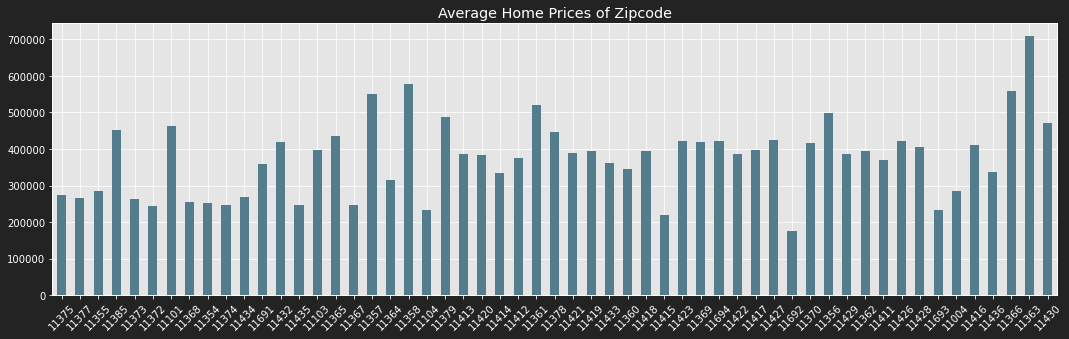

In [21]:
ts_df.mean().plot(kind='bar',
                  figsize=(18, 5),
                  title='Average Home Prices of Zipcode',
                  color='#537d8d')
plt.tick_params('x', labelrotation=45)

### Recent trend

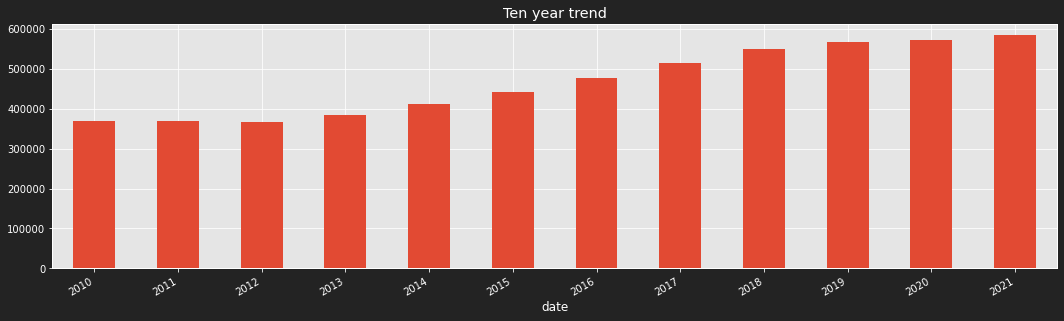

In [25]:
fig, ax = plt.subplots()
ts_df['2010-1-31':].mean(1).resample('A').mean().plot(kind='bar',figsize=(18,5),ax=ax)
ax.set_xticklabels(ts_df['2010-1-31':].mean(1).resample('A').mean().index.strftime("%Y"))
fig.autofmt_xdate()
ax.set_title('Ten year trend')
plt.show()

comment

### Three year ROI

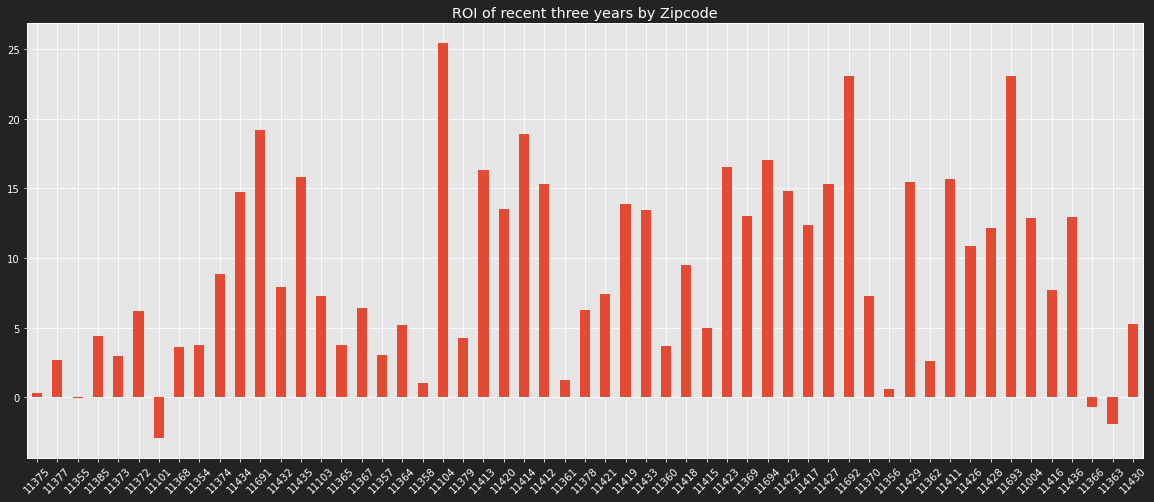

In [26]:
(((ts_df.iloc[-1, :] - ts_df.iloc[-37, :]) / ts_df.iloc[-37, :]) * 100).plot(
    kind='bar', figsize=(20, 8), title='ROI of recent three years by Zipcode')
plt.tick_params('x', labelrotation=45)

comment

### Map of zipcodes

In [27]:
# slicing last date's value
df_join = ts_df[-1:].T.reset_index()
df_join= df_join.rename(columns={'index':'Zipcode'})
df_join['values'] = df_join.iloc[:,1]
df_join = df_join[['Zipcode','values']]
# loading location data
# this data is sourced by the author by scraping web for location info
location_lat_long = pd.read_csv('./data/lat_long.csv')
# some cleaing is required as per scraping overlook
location_lat_long.long = location_lat_long.long.apply(lambda x: x*-1)
location_lat_long = location_lat_long.rename(columns={'index':'Zipcode'})
location_lat_long.Zipcode = location_lat_long.Zipcode.astype('str')
# data for map
map_df = pd.merge(location_lat_long,df_join, how='inner', on='Zipcode')

In [28]:
fig = px.scatter_mapbox(
    map_df,
    lat=map_df.lat,
    lon=map_df.long,
    color='Zipcode',
    zoom=11,
    size='values',
    height=1200,
    template='plotly_dark',
    title='Zipcode location with House Value, as of 2021',
    center={
        'lat': map_df[map_df['Zipcode'] == '11418']['lat'].values[0],
        'lon': map_df[map_df['Zipcode'] == '11418']['long'].values[0]
    })
fig.update_layout(mapbox_style="stamen-toner")  # # "carto-positron"
fig.update_layout(margin={"r": 0, "l": 0, "b": 1})
fig.show()

Comment

# MODEL

## Model on test Zipcode

### grid searching using  pmdarima

BEST MODEL<br>

<br>

Grid searching using pyramidarima for best p, d, q, P, D, Q, m for using in a SARIMA model using predefined conditions and shows model performance for predicting in the future.<br>

<br>

Predefined parameters:<br>
 - d and D is calculated using ndiffs using 'adf'(Augmented Dickey–Fuller test for Unit Roots) for d and 'ocsb' (Osborn, Chui, Smith, and Birchenhall Test for Seasonal Unit Roots) for D.
 - parameters for auto_arima model:
 - start_p = 0; The starting value of p, the order (or number of time lags) of the auto-regressive (“AR”) model.
 - d = d; The order of first-differencing,
 - start_q = 0; order of the moving-average (“MA”) model,
 - max_p = 3, max value for p
 - max_q = 3, max value for q
 - start_P = 0; the order of the auto-regressive portion of the seasonal model,
 - D = D; The order of the seasonal differencing,
 - start_Q = 0; the order of the moving-average portion of the seasonal model,
 - max_P = 3, max value of P
 - max_Q = 3, max value for Q
 - m = 12; The period for seasonal differencing, 
 -              refers to the number of periods in each season.,
 - seasonal = True; this data is seasonal,
 - stationary = False; data is not stationary,
 - information_criterion = 'oob', optimizing on `out-of-bag` sample validation on a scoring metric, 
 -              other information criterias did not perform well
 - out_of_sample_size = 12, step hold out for validation,
 - scoring = 'mse', validation metric,
 - method = 'lbfgs'; limited-memory Broyden-Fletcher-Goldfarb-Shanno with optional box constraints, BFGS is  in the family of quasi-Newton-Raphson methods that approximates the `bfgs` using a limited amount of computer memory.

all other parameters were left at default.

Performing stepwise search to minimize oob
 ARIMA(0,2,0)(0,0,0)[12]             : OOB=51453071.833, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : OOB=47229900.474, Time=0.09 sec
 ARIMA(0,2,1)(0,0,1)[12]             : OOB=47436844.932, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[12]             : OOB=51276016.007, Time=0.04 sec
 ARIMA(1,2,0)(2,0,0)[12]             : OOB=46280232.257, Time=0.42 sec
 ARIMA(1,2,0)(3,0,0)[12]             : OOB=46992892.533, Time=0.47 sec
 ARIMA(1,2,0)(2,0,1)[12]             : OOB=52690534.769, Time=1.18 sec
 ARIMA(1,2,0)(1,0,1)[12]             : OOB=53608838.451, Time=0.42 sec
 ARIMA(1,2,0)(3,0,1)[12]             : OOB=52704169.892, Time=2.27 sec
 ARIMA(0,2,0)(2,0,0)[12]             : OOB=45580256.338, Time=0.21 sec
 ARIMA(0,2,0)(1,0,0)[12]             : OOB=46784245.158, Time=0.07 sec
 ARIMA(0,2,0)(3,0,0)[12]             : OOB=47248893.180, Time=0.91 sec
 ARIMA(0,2,0)(2,0,1)[12]             : OOB=inf, Time=1.65 sec
 ARIMA(0,2,0)(1,0,1)[12]             : OOB=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  243
Model:             SARIMAX(1, 2, 2)x(2, 0, [], 12)   Log Likelihood               -2108.641
Date:                             Fri, 18 Jun 2021   AIC                           4231.282
Time:                                     13:51:27   BIC                           4255.676
Sample:                                          0   HQIC                          4241.110
                                             - 243                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.6332     41.466      0.329      0.742     -67.639      94.905
ar.L1          0.7545      0.377      2.000      0.045       0.015       1.494
ma.L1         -0.7661      0.384     -1.995      0.046      -1.519      -0.013
ma.L2         -0.0172      0.015     -1.144      0.253      -0.047       0.012
ar.S.L12      -0.0190      0.011     -1.683      0.092      -0.041       0.003
ar.S.L24       0.0097      0.058      0.166      0.868      -0.104       0.124
sigma2      2.252e+06   1.23e+05     18.370      0.000    2.01e+06    2.49e+06
===================================================================================
Ljung-Box (L1) (Q):                  14.92   Jarque-Bera (JB):               355.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                            -0.59
Prob(H) (two-sided):                  0.05   Kurtosis:                         8.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

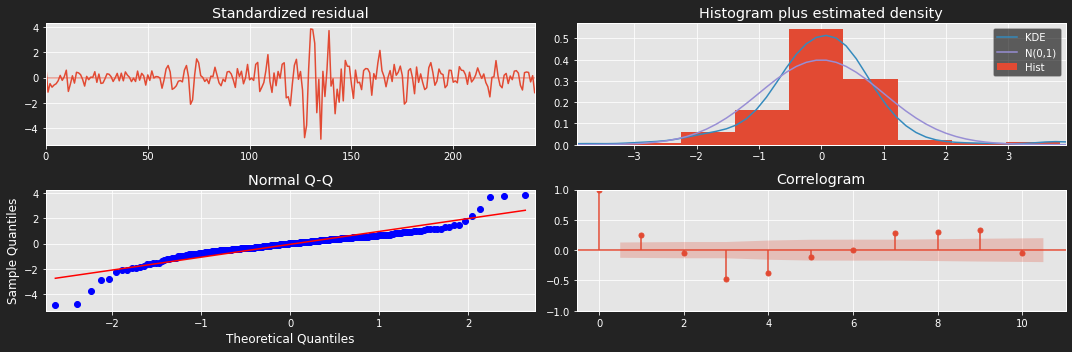

                                                                       Performance on test data of 11417                                                                      
Root Mean Squared Error of test and prediction: 35232.19339655126
Mean Squared Error: 1241307451.5319903
Mean Absolute Error: 31029.564416600693


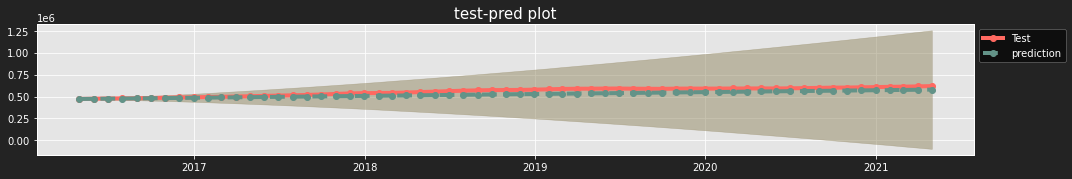

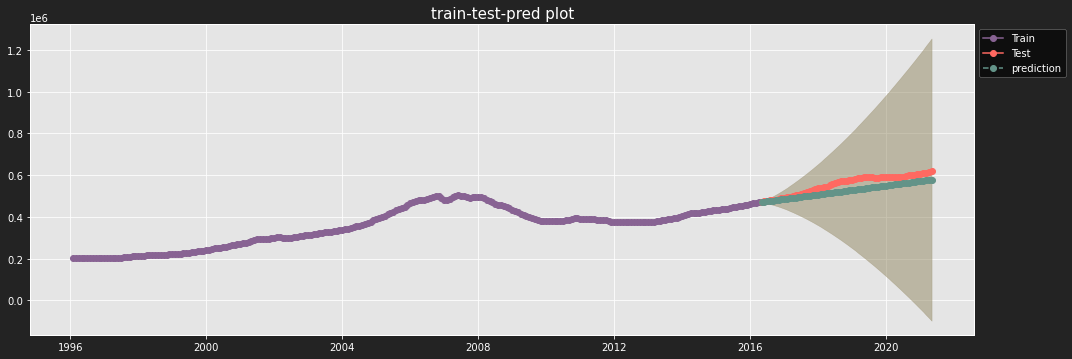

                                                                       Forecast of 11417                                                                      


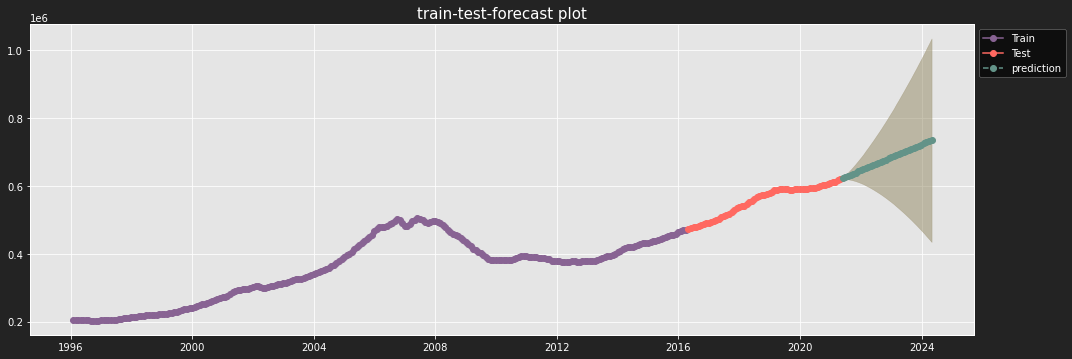

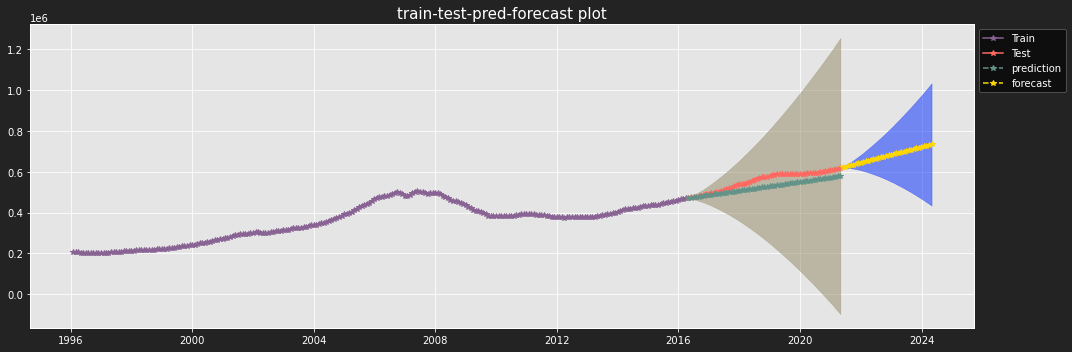

,zipcode,mean_forecasted_roi,lower_forecasted_roi,upper_forecasted_roi,std_forecasted_roi
0,11417,18.57,-29.81,66.95,48.38


In [139]:
fn.grid_search(ts_df[zipcode], train, test, display_roi_results=True);

Model looks good in fitting and predicting with some long tailed residuals at both end. It can capture the future but with less certainty. This is expected as determinant house price is a combination of other factors which were not considered, e.g., loan interest rate, recent development and other external factors.

I am going to consider these parameters as the best one for this type of model. This can be improved by using SARIMAX model by using some of those factors as exog, but this increased model complexity and data needed for model as the exog's true data or a proxy is needed for prediction in the future.

## All Zipcodes

## High return Zipcodes

Criteria for selecting best zipcode:
- Return on investment after three years<br>
<p>
<img src=https://www.ispringsolutions.com/blog/wp-content/uploads/editor/2019/06/ispring-blog-image-1559837814.png
 alt="ROI formula"
 style="float: left; margin-right: 10px;" />
</p>

Cost is assumed to be the last true value of the median price of the zipcode, i.e., value on April 30, 2021. And revenue is assumed to the mean forecasted value after three years, i.e., 36 steps in the future. Then standard deviation is taken of the return on investment on upper confidence level and lower confidence level respectively as a proxy of risk of investment.<br>

Top five zipcodes based on best 15 (27 percent of all available zipcode) ROI and then selecting top 5 of the based on lowest risk, i.e., the risk proxy mentioned above. 

In [30]:
# in tabuler form
((roi_.set_index('zipcode')[[
    'mean_forecasted_roi', 'std_forecasted_roi'
]].sort_values(by='mean_forecasted_roi')[-15:].sort_values(
    by='std_forecasted_roi')[:5]) * 100)

,mean_forecasted_roi,std_forecasted_roi
zipcode,,
11429,22.230379,45.001385
11428,34.241021,47.287097
11427,30.558596,47.554807
11423,39.547861,48.105119
11417,18.564516,48.358635


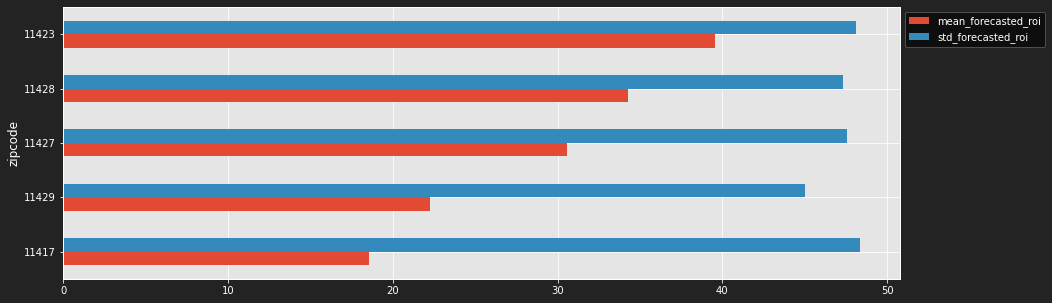

In [31]:
# visualizing
((roi_.set_index('zipcode')[[
    'mean_forecasted_roi', 'std_forecasted_roi'
]].sort_values(by='mean_forecasted_roi', ascending=True)[-15:].sort_values(
    by='std_forecasted_roi', ascending=False)[-5:]) * 100).sort_values(
        by='mean_forecasted_roi', ascending=True).plot(kind='barh',
                                                       figsize=(15, 5))
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

In [32]:
# these are the best zipcodes
best_investments = ((roi_.set_index('zipcode')[[
    'mean_forecasted_roi', 'std_forecasted_roi'
]].sort_values(by='mean_forecasted_roi')[-15:].sort_values(
    by='std_forecasted_roi')[:5]) * 100).index

best_investments

Index(['11429', '11428', '11427', '11423', '11417'], dtype='object', name='zipcode')

In [375]:
# statistical informations
fn.output_df(best_investments, results_)

,aic,bic,oob,rmse,mse,r2,test_roi,pred_roi,three_year_projected_mean_roi,risk,three_year_projected_lower_roi,three_year_projected_upper_roi
ZipCode,,,,,,,,,,,,
11429,4188.75,4216.63,74980018.35,11209.0,10023.0,0.894,15.43,21.44,22.23,70.71,-22.77,67.23
11428,4232.73,4260.60,33049249.59,21826.0,17787.0,0.717,12.16,32.88,34.24,70.56,-13.05,81.53
11427,4193.11,4227.96,29656141.33,32203.0,29725.0,0.423,15.30,29.42,30.56,71.48,-17.00,78.11
11423,4247.35,4271.74,17613244.80,31539.0,28175.0,0.525,16.57,37.91,39.55,70.86,-8.56,87.65
11417,4231.28,4255.68,19098261.43,35227.0,31025.0,0.386,12.41,17.90,18.56,69.87,-29.79,66.92


### Visual


![static image of report](./assets/static.png)

# INTERPRET

In [80]:
# final
fn.output_df(best_investments, results_)

,aic,bic,oob,rmse,mse,r2,test_roi,pred_roi,three_year_projected_mean_roi,risk,three_year_projected_lower_roi,three_year_projected_upper_roi
ZipCode,,,,,,,,,,,,
11429,4188.75,4216.63,74980018.35,11209.0,10023.0,0.894,15.43,21.44,22.23,70.71,-22.77,67.23
11428,4232.73,4260.60,33049249.59,21826.0,17787.0,0.717,12.16,32.88,34.24,70.56,-13.05,81.53
11427,4193.11,4227.96,29656141.33,32203.0,29725.0,0.423,15.30,29.42,30.56,71.48,-17.00,78.11
11423,4247.35,4271.74,17613244.80,31539.0,28175.0,0.525,16.57,37.91,39.55,70.86,-8.56,87.65
11417,4231.28,4255.68,19098261.43,35227.0,31025.0,0.386,12.41,17.90,18.56,69.87,-29.79,66.92


In [34]:
best_investments

Index(['11429', '11428', '11427', '11423', '11417'], dtype='object', name='zipcode')

Best investment opportunities
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


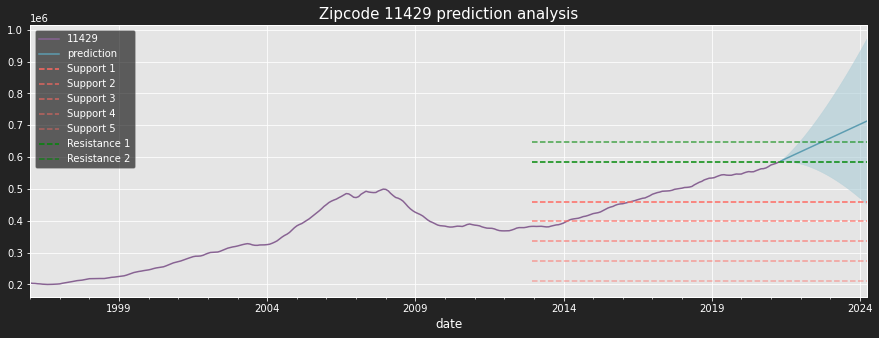

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


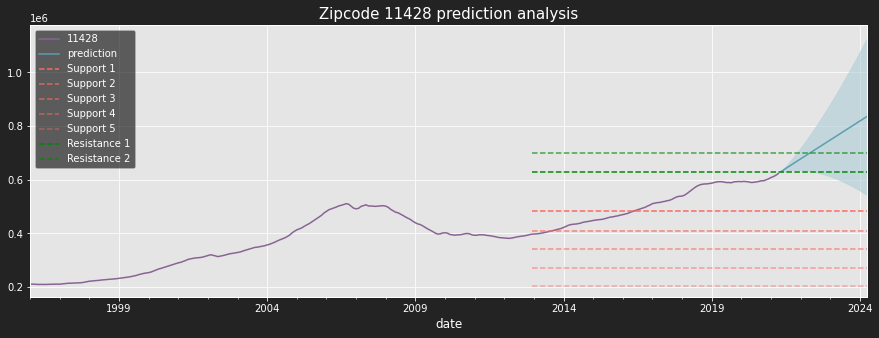

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


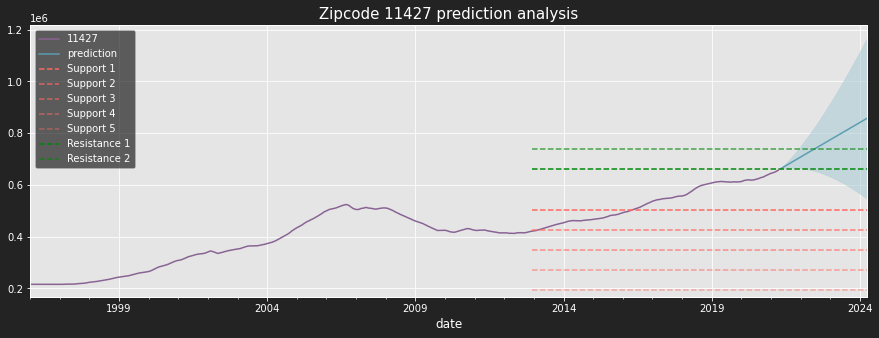

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


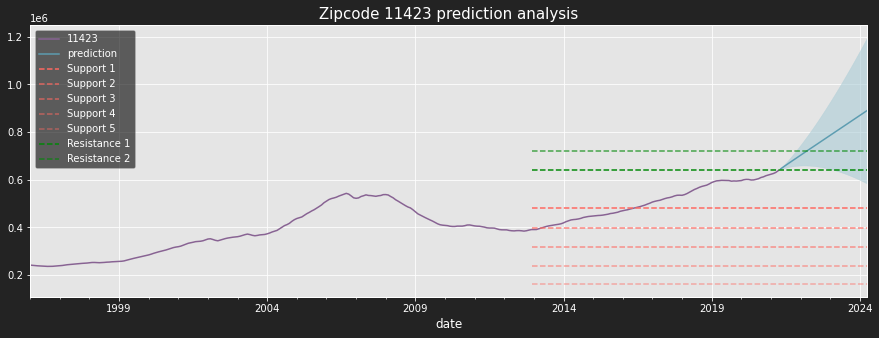

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


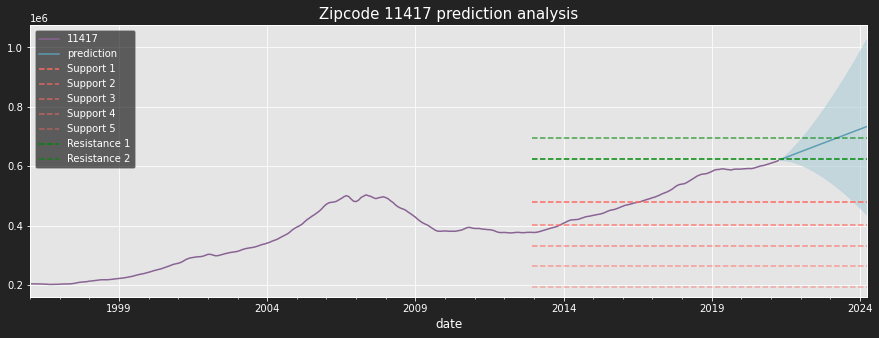

In [381]:
print('Best investment opportunities')
for item in best_investments:
    print(f'{"+"*140}')
    fn.prediction_analysis(ts_df[item], results_[item]['test'],
                           results_[item]['pred_df'])

# RECOMMENDATION

Invest in following zip codes:
 - 11429
 - 11428
 - 11427
 - 11423
 - 11417<br>
 
Stay away from these, they are in a bubble :
- 11693
- 11415

Rule of thumb
 - Go southeast part of Queens for good investment opportunity.
 - Some of the house are overvalued, and awaits correction, be careful of those houses.


# CONCLUSION

Although modeling process is adequate, there are some caveats.
- This analysis does not consider Time Value of Money, one of major driver for any financial decision making process.
- Model generalization can be a issue. Analysis of individual models were not performed. All of the model were run on on a loop and then searched for possible issue based of different metrics, e.g., RMSE, true versus prediction accuracy.
- In general time series models are heavily contingent on model train test split, and recent trend. All of models were split on by 80-20 train-test ratio. There might be so issue of such generalization present in some of the model. Two of them were identified and dealt with, but without significant change in decision criteria. There might be some unidentified ones.

# NEXT STEPS

- add variables to model, using a `SARIMAX` model
 - interest rate
 - other qualitative indicators

- try other models
    - RNN
    - Prophet
    - use transfer learning